Standardization is a technique of data preprocessing. The formula of Standardization is z = (x-m)/s
here,

z is converted row value,
x is prev row value,
m is mean and
s is standard deviation

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
os.chdir("D:\\ML practice datasets")

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='Density'>

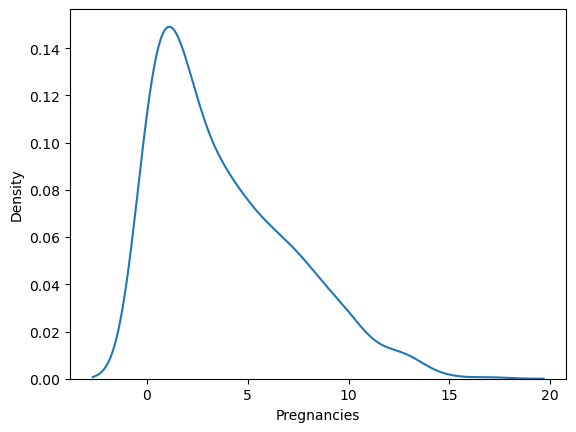

In [4]:
#Just for a density plot
sns.kdeplot(df["Pregnancies"])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Outcome",axis = 1),df["Outcome"],test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

#Transform train and test data to MinMaxScaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(type(X_train_scaled))

<class 'numpy.ndarray'>


In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
print(type(X_train_scaled))

<class 'pandas.core.frame.DataFrame'>


In [14]:
np.round(X_train.describe(), 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.0,537.0,537.0,537.0,537.0,537.0,537.0,537.0
mean,3.9,121.5,69.7,21.0,84.9,32.3,0.5,33.7
std,3.4,32.2,19.5,16.0,118.6,8.0,0.3,12.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0
25%,1.0,99.0,64.0,0.0,0.0,27.5,0.2,24.0
50%,3.0,118.0,72.0,24.0,45.0,32.4,0.4,29.0
75%,6.0,142.0,80.0,33.0,135.0,36.8,0.6,41.0
max,17.0,198.0,122.0,99.0,846.0,67.1,2.4,81.0


In [15]:
np.round(X_train_scaled.describe(), 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.0,537.0,537.0,537.0,537.0,537.0,537.0,537.0
mean,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.1,-3.8,-3.6,-1.3,-0.7,-4.0,-1.2,-1.1
25%,-0.8,-0.7,-0.3,-1.3,-0.7,-0.6,-0.7,-0.8
50%,-0.3,-0.1,0.1,0.2,-0.3,0.0,-0.3,-0.4
75%,0.6,0.6,0.5,0.7,0.4,0.6,0.4,0.6
max,3.9,2.4,2.7,4.9,6.4,4.3,5.8,3.9


In [16]:
print(X_train_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      -1.133115  0.914438       1.045593       1.559000 -0.716523  1.226469   
1      -0.839162 -1.196551      -0.085704      -1.313197 -0.716523 -1.750978   
2      -0.545209  0.014163       0.017141       0.372658 -0.716523  0.566198   
3       0.042697  0.759219       0.428522      -1.313197 -0.716523  0.777983   
4      -1.133115  0.045207       0.119986      -1.313197 -0.716523  0.503908   
..           ...       ...            ...            ...       ...       ...   
532     1.806416 -0.637760       0.325677       1.683878  0.802584  0.080339   
533     0.924557  1.162790      -0.188550      -1.313197 -0.716523 -0.231110   
534     0.042697 -0.855068      -0.239972       0.060462 -0.716523 -0.941212   
535     2.100369 -1.134463       0.222831      -1.313197 -0.716523 -0.268484   
536     0.336650  0.448779       0.634212      -1.313197 -0.716523 -4.018322   

     DiabetesPedigreeFunction       Age

In [17]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
580            0      151             90             46        0  42.1   
418            1       83             68              0        0  18.2   
764            2      122             70             27        0  36.8   
363            4      146             78              0        0  38.5   
757            0      123             72              0        0  36.3   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  
580                     0.371   21  
418                     0.624   27  
